From Introduction to Applied to Applied Linear Algebra: Vectors, Matrices, and Least Squares
# 9. Linear Dynamical Systems

## 9.1 Linear Dynamical Systems

$$ x_{t+1} = A_tx_t + B_tu_t + c_t$$
$$t = 1,2,. . . $$

## 9.3 Epidemic Dynamics

- Susceptible
- Infected
- Recovered
- Deceased

Suppose $x_t = (0.75, 0.10, 0.10, 0.05)$

and suppose that 
- 5\% of the susceptible population acquires the disease
- - 1\% of the infected population will die from the disease
- - 10\% of the infected population will recover and acquire immunity
- - 85\% of the infected poulation will remain infected


In [1]:
import copy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

states = ["Susceptible", "Infected", "Recovered", "Deceased"]
xt = np.matrix([[0.75],
                [0.1],
                [0.1], 
                [0.05]])
transition = np.matrix([[0.95, 0.04, 0, 0],
                        [0.05, 0.85, 0, 0],
                        [0.00, 0.10, 1, 0],
                        [0.00, 0.01, 0, 1]])
xt, transition

(matrix([[0.75],
         [0.1 ],
         [0.1 ],
         [0.05]]),
 matrix([[0.95, 0.04, 0.  , 0.  ],
         [0.05, 0.85, 0.  , 0.  ],
         [0.  , 0.1 , 1.  , 0.  ],
         [0.  , 0.01, 0.  , 1.  ]]))

In [2]:
pd.DataFrame(transition, columns = [f"${s}_t$" for s in states], index = [f"$P({s})" + "_{t+1}$" for s in states])

,$Susceptible_t$,$Infected_t$,$Recovered_t$,$Deceased_t$
$P(Susceptible)_{t+1}$,0.95,0.04,0.0,0.0
$P(Infected)_{t+1}$,0.05,0.85,0.0,0.0
$P(Recovered)_{t+1}$,0.00,0.10,1.0,0.0
$P(Deceased)_{t+1}$,0.00,0.01,0.0,1.0


In [3]:
xt1 =np.matmul(transition,xt)
xt1

matrix([[0.7165],
        [0.1225],
        [0.11  ],
        [0.051 ]])

In [4]:
## Now run the simulation out for 200 periods

In [5]:

evolution = []
xt = np.matrix([[1],
                [0],
                [0], 
                [0]])
max_time = 400
for n in range(max_time):
    current_transition = np.linalg.matrix_power(transition, n)
    current_state = np.matmul(current_transition, xt)
    evolution.append(np.array(current_state.T)[0])
evolution = pd.DataFrame(evolution, columns = states)
evolution

,Susceptible,Infected,Recovered,Deceased
0,1.000000,0.000000e+00,0.000000,0.000000
1,0.950000,5.000000e-02,0.000000,0.000000
2,0.904500,9.000000e-02,0.005000,0.000500
3,0.862875,1.217250e-01,0.014000,0.001400
4,0.824600,1.466100e-01,0.026172,0.002617
...,...,...,...,...
395,0.000002,6.750629e-07,0.909089,0.090909
396,0.000002,6.528412e-07,0.909089,0.090909
397,0.000001,6.313510e-07,0.909089,0.090909
398,0.000001,6.105682e-07,0.909089,0.090909


In [6]:
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
plt.rcParams.update({'font.size': 32})

Text(0.5, 1.0, 'Epidemic Dynamics')

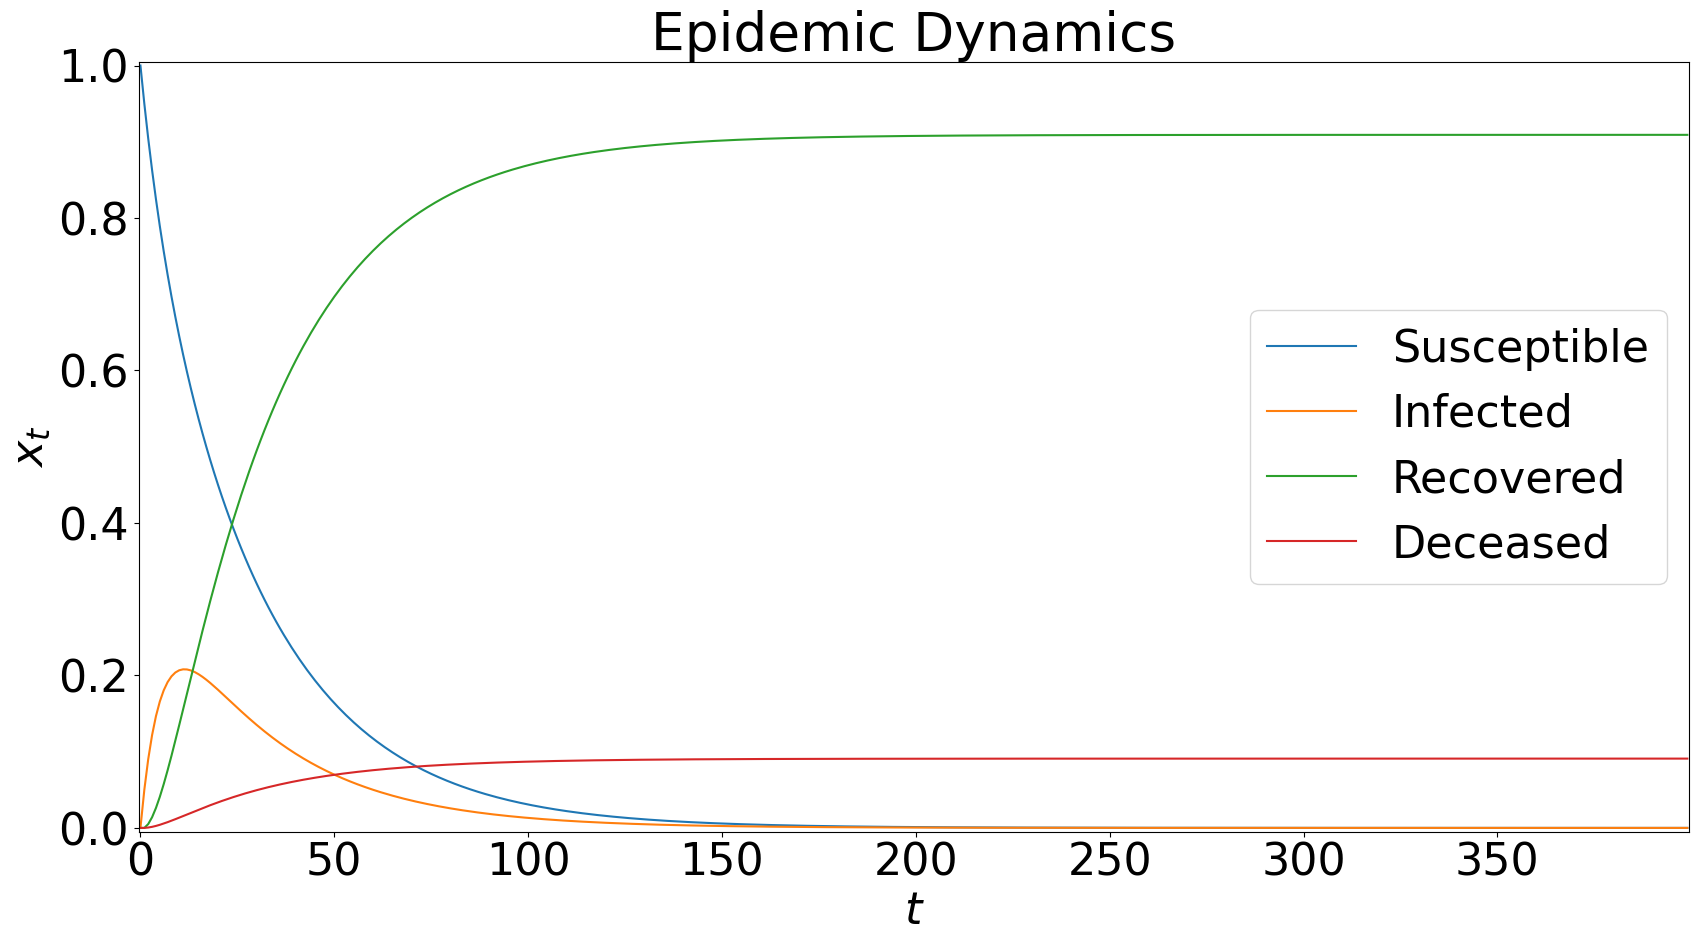

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
evolution.plot(ax = ax)
ax.set_xlabel("$t$")
ax.set_ylabel("$x_t$")
ax.set_title("Epidemic Dynamics")